## Sinusoid mapping study

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import*
import syncmetrics as syncm #from local folder
%matplotlib inline

In [2]:
# get_phase function
def get_phase(f,d):
    """get angular phase
    based on current value (f) and derivative (d)
    The sign of the derivative is used as the criterion to choose the arcsin solution
    """
    g = np.zeros(len(f))
    for i in range(len(f)):
        dn = int(d[i]<0)
        g[i] = (dn*np.pi - (2*dn-1)*asin(f[i]))
    return g%(2*np.pi)

In [3]:
#Load signals
txtload = True
filepath = "./BVP_RESPchest_4_1_4"

raw_A, rawtime, srate = syncm.loadsignal(filepath, 1, txtload)
# Use 15 sec (@ 1000Hz)
nsec = 9
srate = 1000
bsec = 6.5
b = int(bsec * srate)
sig_A = raw_A[b:b+nsec*srate]
t = rawtime[b:b+nsec*srate]

txtload


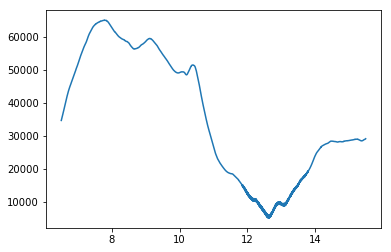

In [4]:
plt.plot(t,sig_A)

In [29]:
# Renormalise time
tn = (t - t[0]) / (t[-1]-t[0]) 

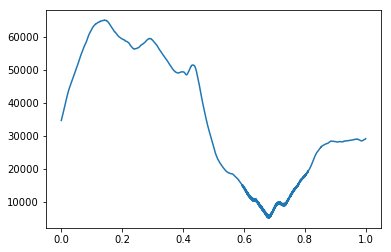

In [30]:
plt.plot(tn,sig_A)

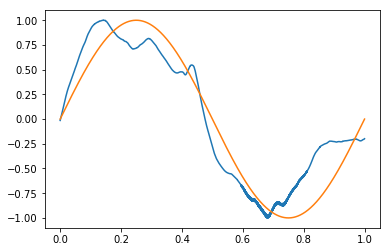

In [38]:
# Renormalise (maxmin) amplitudes
from sklearn.preprocessing import minmax_scale
sn = minmax_scale(sig_A)*2-1
plt.plot(tn,sn)
plt.plot(tn, np.sin(2*np.pi*tn))

In [32]:
phaseA = get_phase(sn[1:], np.diff(sn,0))

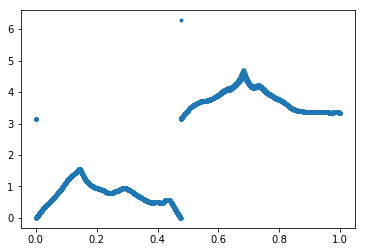

In [33]:
plt.plot(tn[1:],phaseA, '.')

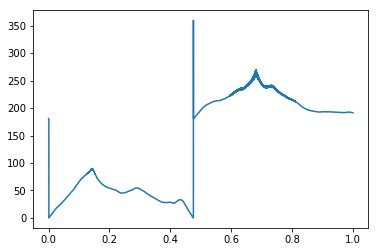

In [34]:
plt.plot(tn[1:],phaseA*180/np.pi)

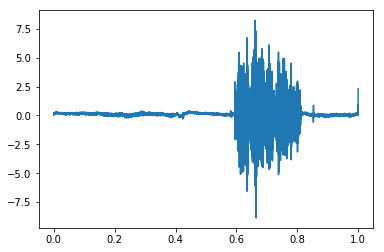

In [35]:
plt.plot(tn,syncm.comp_inst_phase(sn))

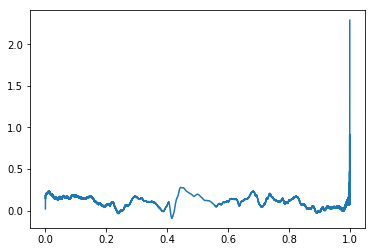

In [36]:
plt.plot(tn,syncm.comp_inst_phase(syncm.smoothing(sn)))

## Compute arc lengths
#### http://tutorial.math.lamar.edu/Classes/CalcII/ArcLength.aspx
$s = \int_{a}^{b}\sqrt{1+{\frac{dy}{dx}}^2}dx$